<a href="https://colab.research.google.com/github/fantaxiah/DeepLearningSpring23/blob/main/Module4_HW1Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Import Packages
import matplotlib.pyplot as plt # plotting library
import numpy as np # this module is useful to work with numerical arrays
import pandas as pd 
import random 
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader,random_split
from torch import nn
import torch.nn.functional as F
import torch.optim as optim

In [3]:
import torch; 
#Sets the seed for generating random numbers.
torch.manual_seed(0)

#torch. nn import gives us access to some helpful neural network things, such as various neural network layer types (things like regular fully-connected layers, convolutional layers (for imagery), recurrent layers...etc).
import torch.nn as nn 

#applies Convolution functions
import torch.nn.functional as F

#allow to access pre-loaded datasets as well as your own data
import torch.utils

#contains parameterizable probability distributions and sampling functions
import torch.distributions

#consists of popular datasets, model architectures, and common image transformations for computer vision
import torchvision

import numpy as np
import matplotlib.pyplot as plt; plt.rcParams['figure.dpi'] = 200

In [4]:
#Check GPU Availability
torch.cuda.is_available()

#Device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


In [5]:
class Encoder(nn.Module):
    def __init__(self, latent_dims):
        super(Encoder, self).__init__()
        self.linear1 = nn.Linear(784, 512)
        self.linear2 = nn.Linear(512, latent_dims)
    
    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = F.relu(self.linear1(x))
        return self.linear2(x)

In [6]:
class Decoder(nn.Module):
    def __init__(self, latent_dims):
        super(Decoder, self).__init__()
        self.linear1 = nn.Linear(latent_dims, 512)
        self.linear2 = nn.Linear(512, 784)
        
    def forward(self, z):
        z = F.relu(self.linear1(z))
        z = torch.sigmoid(self.linear2(z))
        return z.reshape((-1, 1, 28, 28))

In [7]:
class Autoencoder(nn.Module):
    def __init__(self, latent_dims):
        super(Autoencoder, self).__init__()
        self.encoder = Encoder(latent_dims)
        self.decoder = Decoder(latent_dims)
    
    def forward(self, x):
        z = self.encoder(x)
        return self.decoder(z)

In [8]:
#Define latent_dims
latent_dims = 2
autoencoder = Autoencoder(latent_dims).to(device)#GPU

In [9]:
#Load MNIST Data
data_dir = 'dataset'

train_dataset = torchvision.datasets.MNIST(data_dir, train=True, download=True)
test_dataset  = torchvision.datasets.MNIST(data_dir, train=False, download=True)

#Change image data into tensor
train_transform = transforms.Compose([
transforms.ToTensor(),
])

test_transform = transforms.Compose([
transforms.ToTensor(),
])

train_dataset.transform = train_transform
test_dataset.transform = test_transform

100%|██████████| 9912422/9912422 [00:00<00:00, 131352971.68it/s]

Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 31777464.28it/s]


Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 41496012.32it/s]


Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 14871607.16it/s]


Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw



In [10]:
len(train_dataset)
#len(train_dataset)-len(train_dataset)*0.2

60000

In [11]:
#train_data, val_data = random_split(train_dataset, [int(m-m*0.2), int(m*0.2)]) #random split the dataset into 48000(80%) and 12000(20%)
batch_size=128

#creat data loader for train/val/test which are split to mini_batches
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size)
#valid_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,shuffle=True)

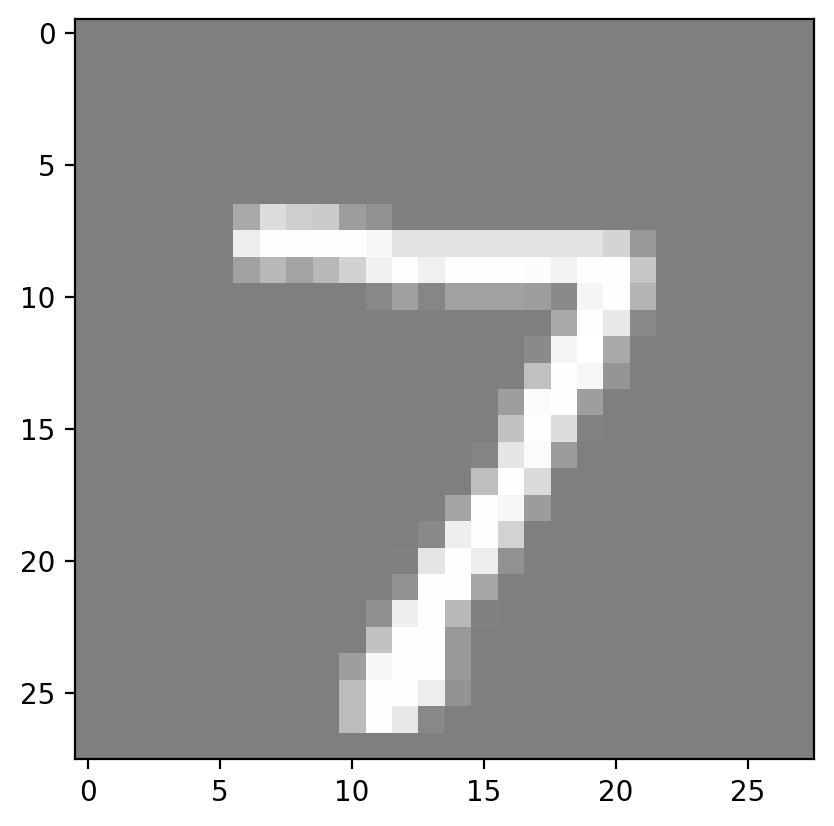

In [12]:
classes = ('0', '1', '2', '3',
           '4', '5', '6', '7', '8', '9')

def imshow(img):
     img = img / 2 + 0.5
     npimg = img.numpy()
     plt.imshow(np.transpose(npimg, (1, 2, 0)))
     plt.show()
    
dataiter = iter(test_dataset)
images, labels = next(dataiter)   

imshow(torchvision.utils.make_grid(images[0:10]))

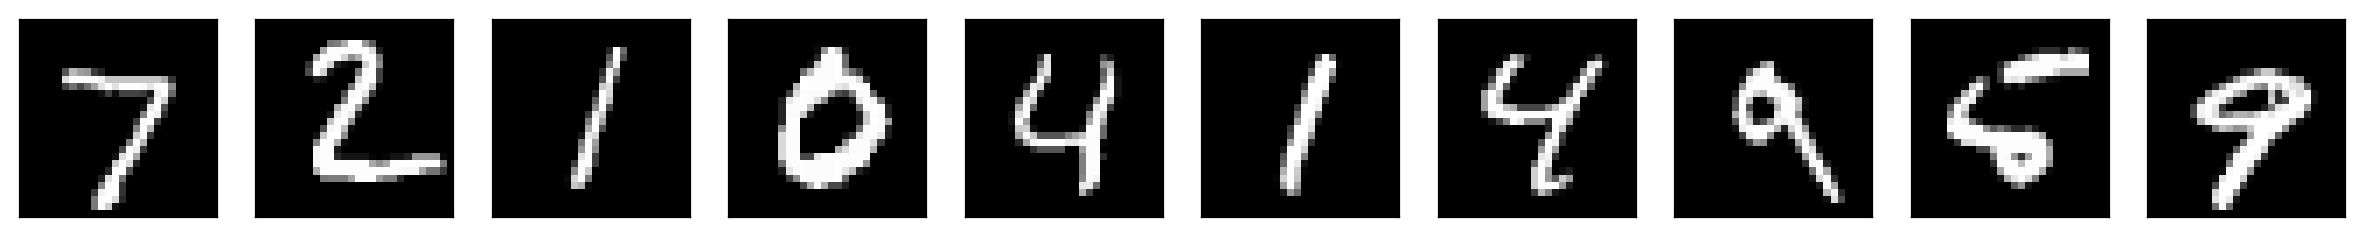

In [13]:
images10 = torch.stack([test_dataset[i][0] for i in range(0,10)])

fig, axs = plt.subplots(1, 10, figsize=(15, 5))
for i in range(10):
    axs[i].imshow(images10[i].squeeze(), cmap='gray')
    axs[i].set_xticks([])
    axs[i].set_yticks([])
plt.show()

In [14]:
def train(autoencoder, data, epochs=20):
    opt = torch.optim.Adam(autoencoder.parameters())
    train_losses = []
    for epoch in range(epochs):
        train_loss = 0.0
        for x, y in data:
            x = x.to(device)
            opt.zero_grad()
            x_hat = autoencoder(x)
            loss = ((x - x_hat)**2).mean()
            loss.backward()
            opt.step()
            train_loss += loss.item() * x.size(0)
        train_loss /= len(data.dataset)
        train_losses.append(train_loss)
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {train_loss:.4f}')
    return autoencoder

In [15]:
#train the train_data
autoencoder_train = train(autoencoder, train_loader)

Epoch [1/20], Loss: 0.0567
Epoch [2/20], Loss: 0.0483
Epoch [3/20], Loss: 0.0466
Epoch [4/20], Loss: 0.0456
Epoch [5/20], Loss: 0.0448
Epoch [6/20], Loss: 0.0441
Epoch [7/20], Loss: 0.0435
Epoch [8/20], Loss: 0.0430
Epoch [9/20], Loss: 0.0426
Epoch [10/20], Loss: 0.0423
Epoch [11/20], Loss: 0.0420
Epoch [12/20], Loss: 0.0417
Epoch [13/20], Loss: 0.0415
Epoch [14/20], Loss: 0.0413
Epoch [15/20], Loss: 0.0410
Epoch [16/20], Loss: 0.0408
Epoch [17/20], Loss: 0.0406
Epoch [18/20], Loss: 0.0404
Epoch [19/20], Loss: 0.0403
Epoch [20/20], Loss: 0.0401


In [16]:
#train the test_data
autoencoder_test = train(autoencoder, test_loader)

Epoch [1/20], Loss: 0.0406
Epoch [2/20], Loss: 0.0400
Epoch [3/20], Loss: 0.0398
Epoch [4/20], Loss: 0.0396
Epoch [5/20], Loss: 0.0394
Epoch [6/20], Loss: 0.0392
Epoch [7/20], Loss: 0.0390
Epoch [8/20], Loss: 0.0390
Epoch [9/20], Loss: 0.0388
Epoch [10/20], Loss: 0.0387
Epoch [11/20], Loss: 0.0386
Epoch [12/20], Loss: 0.0385
Epoch [13/20], Loss: 0.0384
Epoch [14/20], Loss: 0.0384
Epoch [15/20], Loss: 0.0382
Epoch [16/20], Loss: 0.0382
Epoch [17/20], Loss: 0.0381
Epoch [18/20], Loss: 0.0381
Epoch [19/20], Loss: 0.0380
Epoch [20/20], Loss: 0.0379


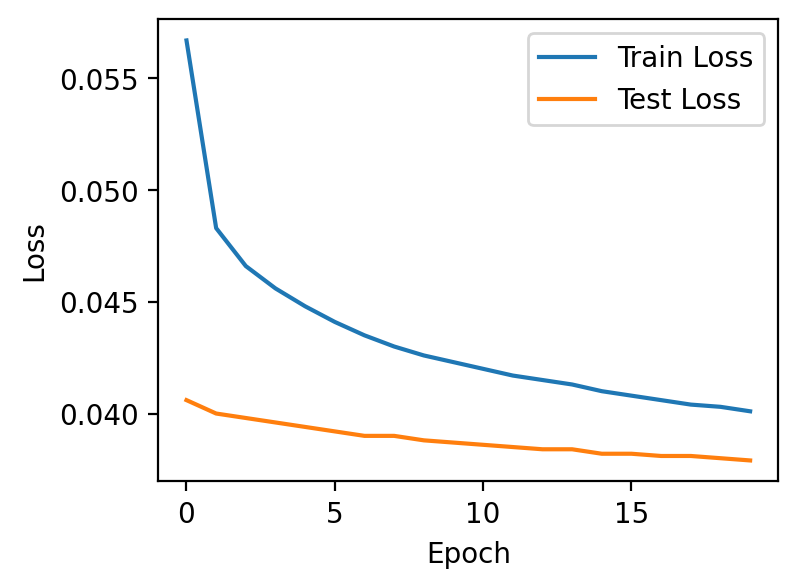

In [17]:
#Graph the train loss and test loss

def plot_loss(train_loss, test_loss):
    fig, ax = plt.subplots(figsize=(4, 3))
    ax.plot(train_loss, label='Train Loss')
    ax.plot(test_loss, label='Test Loss')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend()
    plt.show()

train_loss = [0.0567, 0.0483, 0.0466, 0.0456, 0.0448, 0.0441, 0.0435, 0.0430, 0.0426, 0.0423, 
              0.0420, 0.0417, 0.0415, 0.0413, 0.0410, 0.0408, 0.0406, 0.0404, 0.0403, 0.0401]
test_loss = [0.0406, 0.0400, 0.0398, 0.0396, 0.0394, 0.0392, 0.0390, 0.0390, 0.0388, 0.0387, 
             0.0386, 0.0385, 0.0384, 0.0384, 0.0382, 0.0382, 0.0381, 0.0381, 0.0380, 0.0379]

plot_loss(train_loss, test_loss)

In [18]:
#Randomly select 10 images from the test dataset
indices = random.sample(range(len(test_dataset)), 10)
images = torch.stack([test_dataset[i][0] for i in indices])

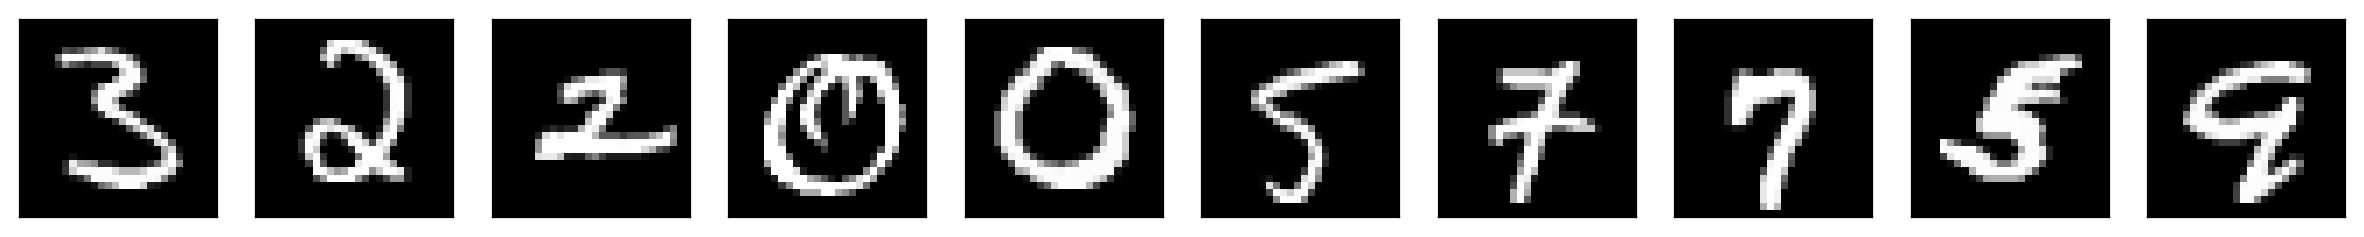

In [19]:
fig, axs = plt.subplots(1, 10, figsize=(15, 5))
for i in range(10):
    axs[i].imshow(images[i].squeeze(), cmap='gray')
    axs[i].set_xticks([])
    axs[i].set_yticks([])
plt.show()

In [20]:
data_loader = torch.utils.data.DataLoader(images, batch_size=2, shuffle=True)

#Training parameters
num_epochs = 10
batch_size = 2
learning_rate = 0.001

#Define model, loss function, and optimizer
model = Autoencoder(latent_dims=2)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#Train
for epoch in range(num_epochs):
    for data in data_loader:
        img = data
        #Forward
        output = model(img)
        loss = criterion(output, img)
        
        #Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

print('Done')

Epoch [1/10], Loss: 0.1676
Epoch [2/10], Loss: 0.0803
Epoch [3/10], Loss: 0.0626
Epoch [4/10], Loss: 0.0936
Epoch [5/10], Loss: 0.0672
Epoch [6/10], Loss: 0.0777
Epoch [7/10], Loss: 0.0600
Epoch [8/10], Loss: 0.0589
Epoch [9/10], Loss: 0.0536
Epoch [10/10], Loss: 0.0370
Done


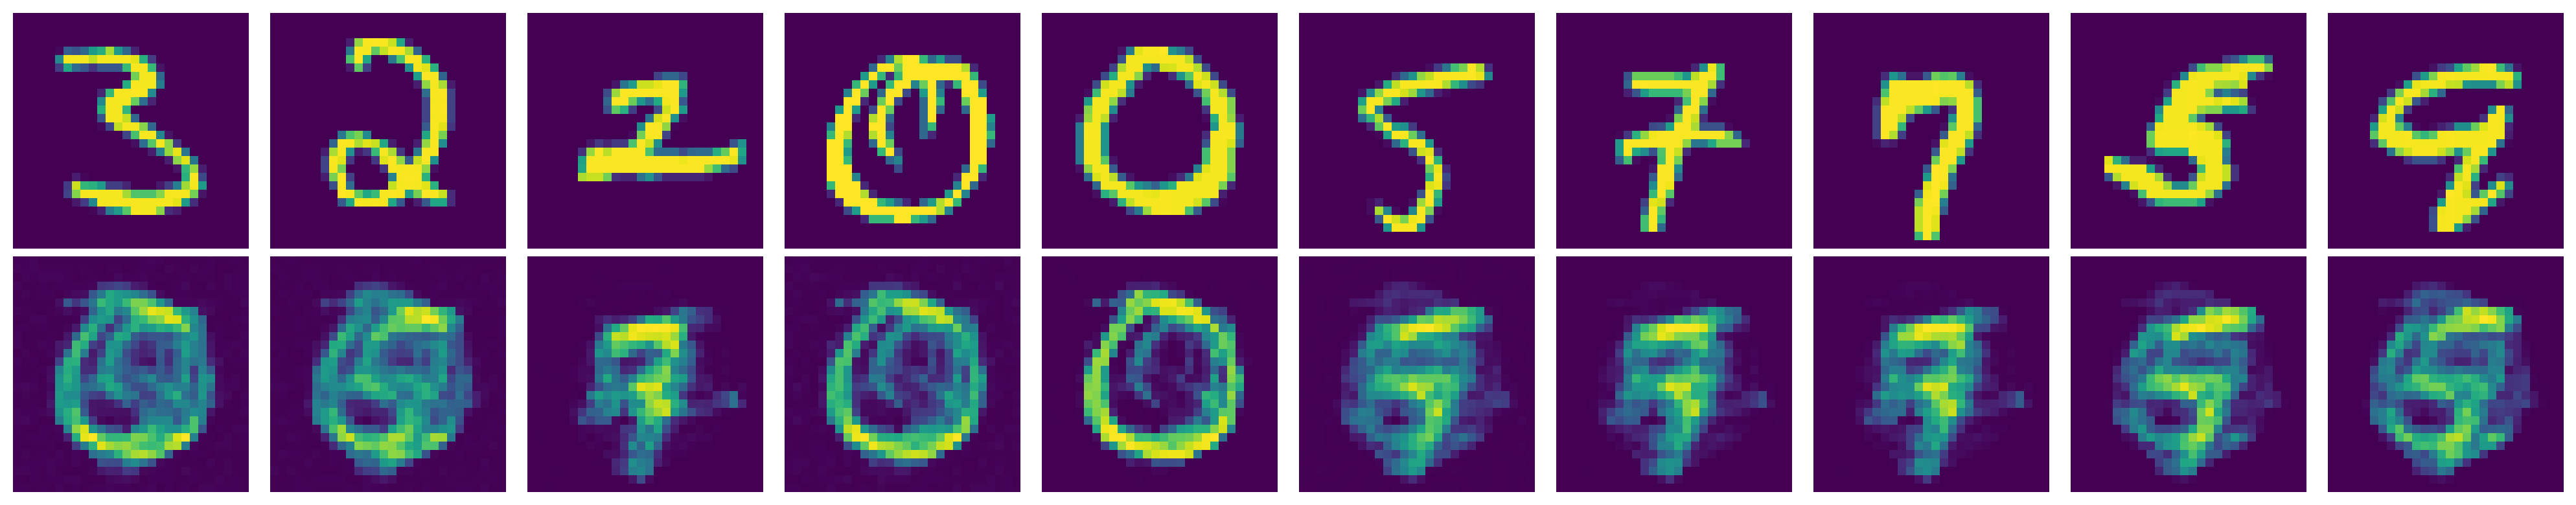

In [21]:
# Display original and decoded images
with torch.no_grad():
    decoded_imgs = model(images).detach().numpy()

n = len(images)
fig, ax = plt.subplots(2, n, figsize=(n*2, 4))

for i in range(n):
    # display original images
    ax[0][i].imshow(images[i].permute(1, 2, 0))
    ax[0][i].axis('off')
    
    # display reconstructed images
    ax[1][i].imshow(decoded_imgs[i].transpose(1, 2, 0))
    ax[1][i].axis('off')

plt.tight_layout()
plt.show()